In [27]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file_path = "C:/Users/Akif/Desktop/football/rankingv5v2.csv"
df = pd.read_csv(file_path)

In [10]:
df = df.dropna()

In [11]:
le = LabelEncoder()

categorical_cols = ['home_club_id', 'away_club_id', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
features = ['home_club_id', 'away_club_id', 'attendance', 'home_team_points', 'away_team_points',
            'home_attack_value', 'home_attack_count', 'away_attack_value', 'away_attack_count',
            'home_midfield_value', 'home_midfield_count', 'away_midfield_value', 'away_midfield_count',
            'home_defender_value', 'home_defender_count', 'away_defender_value', 'away_defender_count',
            'home_goalkeeper_value', 'home_goalkeeper_count', 'away_goalkeeper_value', 'away_goalkeeper_count',
            'home_total_market_value', 'away_total_market_value', 'home_power_score', 'away_power_score']

X = df[features]
y = df['result']

y = le.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.07      0.11       864
           1       0.58      0.82      0.68      1640
           2       0.55      0.54      0.54      1111

    accuracy                           0.55      3615
   macro avg       0.47      0.47      0.44      3615
weighted avg       0.50      0.55      0.50      3615



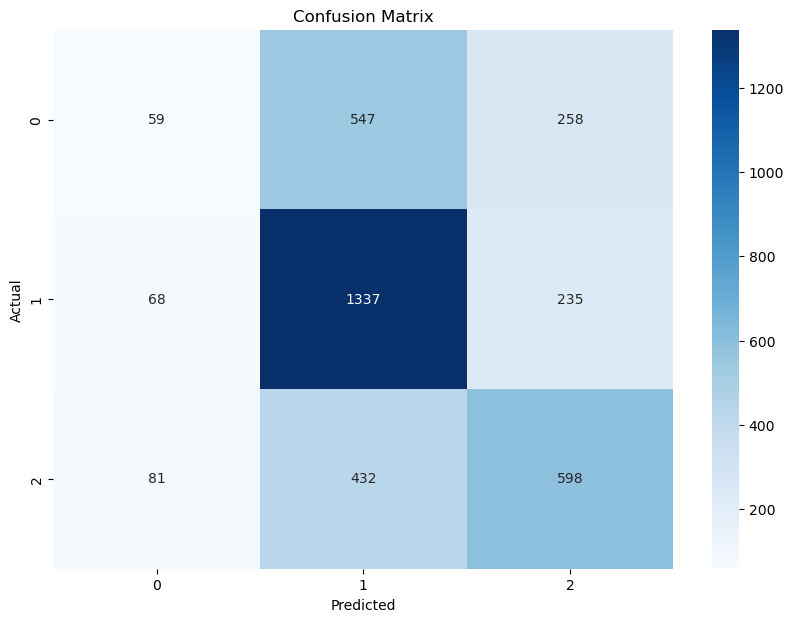

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.inverse_transform(model.classes_), yticklabels=le.inverse_transform(model.classes_))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
y_prob = model.predict_proba(X_test)

print(y_prob[:5])

[[0.25055233 0.49557909 0.25386858]
 [0.24051715 0.37668286 0.38279999]
 [0.30736103 0.2020152  0.49062377]
 [0.24888199 0.40113043 0.34998758]
 [0.24673307 0.15568466 0.59758227]]


In [31]:
import pandas as pd
import numpy as np

# Assuming you have already trained your model and have the label encoder loaded
# Define the columns that your model expects
columns = [
    'home_club_id', 'away_club_id', 'attendance', 'home_team_points', 'away_team_points',
    'home_attack_value', 'home_attack_count', 'away_attack_value', 'away_attack_count',
    'home_midfield_value', 'home_midfield_count', 'away_midfield_value', 'away_midfield_count',
    'home_defender_value', 'home_defender_count', 'away_defender_value', 'away_defender_count',
    'home_goalkeeper_value', 'home_goalkeeper_count', 'away_goalkeeper_value', 'away_goalkeeper_count',
    'home_total_market_value', 'away_total_market_value', 'home_power_score', 'away_power_score'
]

# Create a DataFrame to hold match data
match_data = pd.DataFrame(columns=columns)

# Fill in the match data with the actual statistics
# Replace the values with actual data for your specific match
match_data = match_data.append({
    'home_club_id': 1421,
    'away_club_id': 583,
    'attendance': 20000,
    'home_team_points': 50,
    'away_team_points': 48,
    'home_attack_value': 85.0,
    'home_attack_count': 100,
    'away_attack_value': 82.0,
    'away_attack_count': 95,
    'home_midfield_value': 80.0,
    'home_midfield_count': 98,
    'away_midfield_value': 79.0,
    'away_midfield_count': 96,
    'home_defender_value': 75.0,
    'home_defender_count': 100,
    'away_defender_value': 74.0,
    'away_defender_count': 97,
    'home_goalkeeper_value': 90.0,
    'home_goalkeeper_count': 1,
    'away_goalkeeper_value': 88.0,
    'away_goalkeeper_count': 1,
    'home_total_market_value': 500.0,
    'away_total_market_value': 480.0,
    'home_power_score': 90.0,
    'away_power_score': 88.0
}, ignore_index=True)

# Convert the DataFrame to a numpy array
input_features = match_data.values

# Make predictions using the model
y_prob = model.predict_proba(input_features)
y_pred = model.predict(input_features)

# Map the prediction to actual labels
predicted_result = le.inverse_transform(y_pred)[0]

# Get the probabilities for each outcome
win_prob = y_prob[0][le.transform([1])[0]]
draw_prob = y_prob[0][le.transform([0])[0]]
lose_prob = y_prob[0][le.transform([2])[0]]

# Display the results
print(f"Predicted Result: {predicted_result}")
print(f"Win Probability: {win_prob}")
print(f"Draw Probability: {draw_prob}")
print(f"Lose Probability: {lose_prob}")


Predicted Result: 2
Win Probability: 0.35621275860473267
Draw Probability: 0.11617071144090824
Lose Probability: 0.5276165299543591


C:\Users\Akif\AppData\Local\Temp\ipykernel_1808\2317949717.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  match_data = match_data.append({
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


## Model Save

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'football_prediction_model.pkl')

In [ ]:
# Load the model
model = joblib.load('football_prediction_model.pkl')

# Make predictions with the loaded model
y_pred = model.predict(X_test)